<a href="https://colab.research.google.com/github/bhende27/Prediction-of-Customer-Leaving-the-Bank/blob/master/Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set consists of data of customers of a bank.By using ANN Algorithm we will try to predict which customer will stay or exit the bank.This prediction will be useful for the Bank to make strategy to retain customers.

### PART A: Preprocessing the input data

**1.Importing the Python Modules and Dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634601,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


So we can see that the Data has the details of the customer's like Customer ID,Name,Credit Score,Country,Age,Sex and the dealings of a customer with the bank. 

2.*** Performing Exploratory data analysis***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum(axis=0)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64


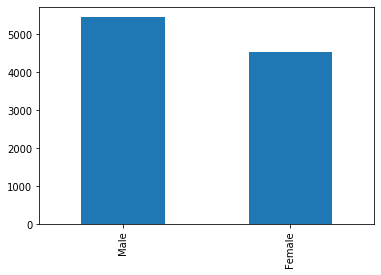

In [ ]:
Gencount=data["Gender"].value_counts()
Gencount.plot.bar()
print(Gencount)

1    7055
0    2945
Name: HasCrCard, dtype: int64


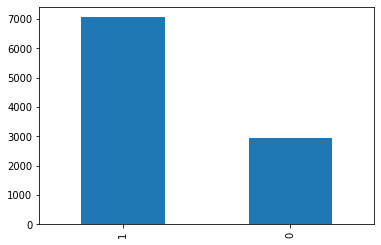

In [ ]:
cardcount=data["HasCrCard"].value_counts()
cardcount.plot.bar()
print(cardcount)

1    5151
0    4849
Name: IsActiveMember, dtype: int64


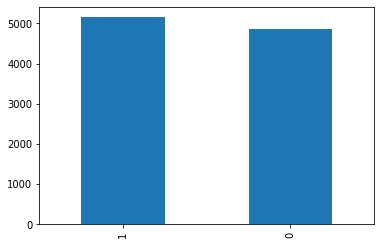

In [ ]:
IsActiveMembercount=data["IsActiveMember"].value_counts()
IsActiveMembercount.plot.bar()
print(IsActiveMembercount)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


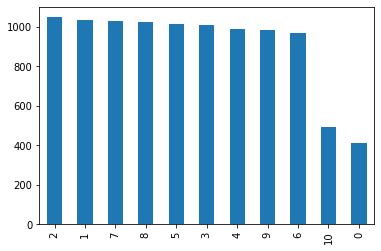

In [ ]:
Tencount=data["Tenure"].value_counts()
Tencount.plot.bar()
print(Tencount)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


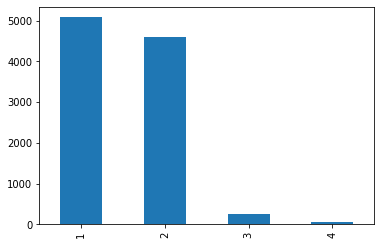

In [ ]:
NumOfProductscount=data["NumOfProducts"].value_counts()
NumOfProductscount.plot.bar()
print(NumOfProductscount)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


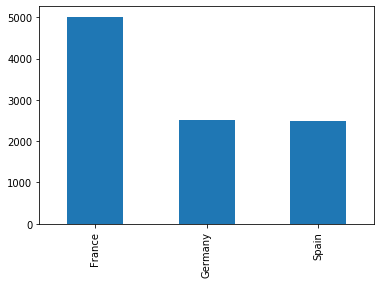

In [ ]:
Geocount=data["Geography"].value_counts()
Geocount.plot.bar()
print(Geocount)

In [ ]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


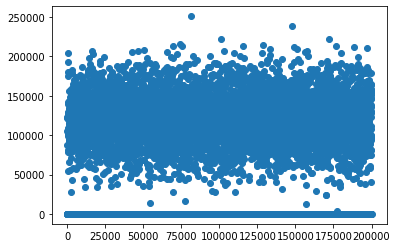

In [ ]:
plt.scatter(data["EstimatedSalary"], data["Balance"])
plt.show()

**3.Generating Array of Features and Target Values**

In [ ]:
X=data.iloc[:,3:13].values
#X
y=data.iloc[:,13].values
print(X[0:5][:])
print(y[0:5][:])


[[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 'Female' 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 'Female' 43 2 125510.82 1 1 1 79084.1]]
[1 0 1 0 0]


4.Encoding the Catogerical Data 

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X_1=LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1]) #Encoding the values of column Country
labelencoder_X_2=LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])
onehotencoder=OneHotEncoder(categorical_features=[1])
X=onehotencoder.fit_transform(X).toarray()
X=X[:,1:]
print(X[0:5][:])
print(y[0:5][:])

[[0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00 4.2000000e+01
  2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 0.0000000e+00 4.1000000e+01
  1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 0.0000000e+00 4.2000000e+01
  8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00 0.0000000e+00
  1.1393157e+05]
 [0.0000000e+00 0.0000000e+00 6.9900000e+02 0.0000000e+00 3.9000000e+01
  1.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 0.0000000e+00
  9.3826630e+04]
 [0.0000000e+00 1.0000000e+00 8.5000000e+02 0.0000000e+00 4.3000000e+01
  2.0000000e+00 1.2551082e+05 1.0000000e+00 1.0000000e+00 1.0000000e+00
  7.9084100e+04]]
[1 0 1 0 0]


**5.Splitting the dataset to Train and Test Set**

In [ ]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
print(X_train[0:5][:])
print(X_test[0:5][:])

[[0.0000000e+00 1.0000000e+00 6.6700000e+02 0.0000000e+00 3.4000000e+01
  5.0000000e+00 0.0000000e+00 2.0000000e+00 1.0000000e+00 0.0000000e+00
  1.6383064e+05]
 [1.0000000e+00 0.0000000e+00 4.2700000e+02 1.0000000e+00 4.2000000e+01
  1.0000000e+00 7.5681520e+04 1.0000000e+00 1.0000000e+00 1.0000000e+00
  5.7098000e+04]
 [0.0000000e+00 0.0000000e+00 5.3500000e+02 0.0000000e+00 2.9000000e+01
  2.0000000e+00 1.1236734e+05 1.0000000e+00 1.0000000e+00 0.0000000e+00
  1.8563076e+05]
 [0.0000000e+00 1.0000000e+00 6.5400000e+02 1.0000000e+00 4.0000000e+01
  5.0000000e+00 1.0568363e+05 1.0000000e+00 1.0000000e+00 0.0000000e+00
  1.7361709e+05]
 [0.0000000e+00 1.0000000e+00 8.5000000e+02 0.0000000e+00 5.7000000e+01
  8.0000000e+00 1.2677630e+05 2.0000000e+00 1.0000000e+00 1.0000000e+00
  1.3229849e+05]]
[[1.0000000e+00 0.0000000e+00 5.9700000e+02 0.0000000e+00 3.5000000e+01
  8.0000000e+00 1.3110104e+05 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.9285267e+05]
 [0.0000000e+00 0.0000000e+00 5.2

**6.Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
print(X_train[0:5][:])
print(X_test[0:5][:])

[[-0.5698444   1.74309049  0.16958176 -1.09168714 -0.46460796  0.00666099
  -1.21571749  0.8095029   0.64259497 -1.03227043  1.10643166]
 [ 1.75486502 -0.57369368 -2.30455945  0.91601335  0.30102557 -1.37744033
  -0.00631193 -0.92159124  0.64259497  0.9687384  -0.74866447]
 [-0.5698444  -0.57369368 -1.19119591 -1.09168714 -0.94312892 -1.031415
   0.57993469 -0.92159124  0.64259497 -1.03227043  1.48533467]
 [-0.5698444   1.74309049  0.03556578  0.91601335  0.10961719  0.00666099
   0.47312769 -0.92159124  0.64259497 -1.03227043  1.27652776]
 [-0.5698444   1.74309049  2.05611444 -1.09168714  1.73658844  1.04473698
   0.8101927   0.8095029   0.64259497  0.9687384   0.55837842]]
[[ 1.62776996 -0.57427105 -0.56129438 -1.11339196 -0.39401698  0.9869706
   0.85962168 -0.8733766   0.66011376  0.97628121  1.62185911]
 [-0.61433742 -0.57427105 -1.33847768 -1.11339196  0.07611425 -1.08432132
   0.4031217  -0.8733766   0.66011376 -1.02429504  0.504204  ]
 [-0.61433742  1.74133801  0.58347561 -1.11

### PART B: Building the ANN

**7.Importing the Keras Library **

In [ ]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense 

**8.Initialising the ANN **

In [ ]:
classifier=Sequential()

### PART C: Making prediction and evaluating the model

**9.Adding the input layer and the first hidden layer **

In [ ]:
classifier.add(Dense(output_dim=6,init='uniform',activation='relu',input_dim=11))

**10.We will try diffrent number of layers and nodes the second hidden Layer **

In [ ]:
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))
#classifier.add(Dense(output_dim=12,init='uniform',activation='relu'))
#classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))

**11.Adding the output  layer **

In [ ]:
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

**12.Compliling the ANN**

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['recall'])

ValueError: ignored

**13.Fitting the ANN to training set **

In [ ]:
#classifier.fit(X_train,y_train, batch_size=10, nb_epoch=100)
classifier.fit(X_train, y_train,batch_size=10,nb_epoch=30)

Epoch 1/30
8000/8000 [==============================] - 1s 174us/step - loss: 0.4842 - acc: 0.7955
Epoch 2/30
8000/8000 [==============================] - 1s 129us/step - loss: 0.4287 - acc: 0.7960
Epoch 3/30
8000/8000 [==============================] - 1s 129us/step - loss: 0.4239 - acc: 0.7960
Epoch 4/30
8000/8000 [==============================] - 1s 122us/step - loss: 0.4204 - acc: 0.8175
Epoch 5/30
8000/8000 [==============================] - 1s 124us/step - loss: 0.4179 - acc: 0.8260
Epoch 6/30
8000/8000 [==============================] - 1s 128us/step - loss: 0.4161 - acc: 0.8271
Epoch 7/30
8000/8000 [==============================] - 1s 128us/step - loss: 0.4137 - acc: 0.8297
Epoch 8/30
8000/8000 [==============================] - 1s 135us/step - loss: 0.4121 - acc: 0.8336
Epoch 9/30
8000/8000 [==============================] - 1s 129us/step - loss: 0.4107 - acc: 0.8335
Epoch 10/30
8000/8000 [==============================] - 1s 123us/step - loss: 0.4094 - acc: 0.8344
Epoch 11/

**14.Predicting the test set results **

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)
#y_pred

**15.Making the confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show([])

NameError: ignored

In [ ]:
print(cm)
cp=cm[0][0]+cm[1][1]
wp=cm[0][1]+cm[1][0]
print("Correct prediction= %d" %(cp))
print("Wrong prediction= %d" %(wp))

[[1555   40]
 [ 284  121]]
Correct prediction= 1676
Wrong prediction= 324


In [ ]:
accuracy= (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
recall=cm[0][0]/(cm[0][0]+cm[1][0])
precision=cm[0][0]/(cm[0][0]+cm[0][1])
print("Accuracy: %f " %(accuracy))
print("Recall: %f " %(recall))
print("Precision: %f " %(precision))

Accuracy: 0.838000 
Recall: 0.845568 
Precision: 0.974922 


![It has been shown by Ian Goodfellow (the creator of the generative adversarial network) that increasing the number of layers of neural networks tends to improve overall test set accuracy.](https://)https://miro.medium.com/max/1824/1*LtzuTUh0kkCfvlwKxx2zvw.png